# SIESTA: Statistical matchIng between rEal and Synthetic sTellar populAtions

The SIESTA code is a Python tool developed for characterizing star clusters by statistically comparing their stellar distribution in an observed Color-Magnitude Diagram (CMD) with the predictions of synthetic stellar populations. The current implementation aims to determine the cluster's **age, metallicity, distance, and color excess**, while also fitting its **binary fraction**. 

In this Notebook, you will analyze the results of the MCMC sampling performed using the SIESTA code. We assume you've already used the  ``InitializationHUB`` Notebook to create inputs for the SIESTA code and run the program for a given star cluster. The product of running SIESTA is a ``backend.h5`` file with all the information about the MCMC sampling. Let's open this file and analyze the results.

#### Warning

You may be tempted to run this Notebook to check the progress of SIESTA while it is still running. This may lead to crashes in the SIESTA code.

## First steps

We will start by importing the necessary libraries.

In [10]:
#Import libraries
import importlib
import sys ; sys.path.append('scripts')
import ChainAnalysis
import matplotlib.pyplot as plt
%matplotlib widget

Now, let's import the ``backend.h5`` file. In the following block, fill the  ``project_name`` parameter with the project you want to evaluate. This name must correspond to a folder in the ``projects`` directory, created by SIESTA.

In [11]:
#Choose a project
project = 'L114'
#Get data
importlib.reload(ChainAnalysis)
auto_corr_time, backend = ChainAnalysis.ImportData(project)

## Checking convergence

It's important to certify that our chain has converged before inferring results for the star cluster. The creators of ``emcee`` suggest using the chain's autocorrelation time for that end. When running an MCMC sampler, this parameter tends to increase while the iterations advance, saturating when the chain gets too long. We consider that we've reached convergence when this saturation occurs. Beyond that, we need to discard correlated iterations before inferring parameters for the cluster. To ensure that we'll still have a statistically relevant number of independent samples, the number of iterations must also be a few times larger than the correlation time.

Following the suggestions of the creators of ``emcee``, SIESTA takes these  into account by running the sampler until these two conditions are satisfied:
- The variation of the autocorrelation time between samples separated by 100 iterations must be smaller than 2%.
- The total number of iterations is greater than 50 times the last correlation time evaluated.

Even though these criteria are already implemented in the code, it's still relevant to check the convergence visually, which you can do by running the next block, where we plot the progression of the average autocorrelation time.


Final mean autocorrelation time: 47.80
	 Total iteration number is ~29 times larger than this value!
	 Final variation is 1.91%


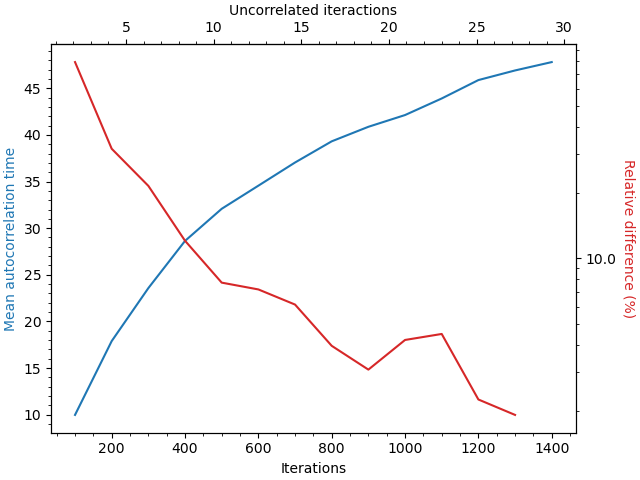

In [12]:
#Autocorrelation time
importlib.reload(ChainAnalysis)
try: plt.close(figAutoCorrelation)
except: ''
tau,figAutoCorrelation = ChainAnalysis.AutoCorrelation(auto_corr_time)

## Checking samples

Before analyzing the solutions, in the more traditional form of the corner plot, it's interesting to check how the walkers behaved during the MCMC sampling. This block plots the different values of a subset of walkers during the sampling for each parameter (metallicity, age, distance, color excess, and binary fraction). We also display the posterior probability of the walkers during the sampling. 

You can use the ``Filter`` parameter to choose how you want to visualize the walkers' path. Setting it as ``True`` will display only the "effective" iterations: without the burn-in phase and thinning correlated iterations. Those are the iterations we use for characterizing the cluster. If you wish to visualize the full path, you can set this variable as ``False``.

You can also define how many walkers you want to see in the figure using the "walkers_show" parameter. Select any integer between 1 and the total number of walkers you've defined earlier. When choosing this and the "Filter" parameters, keep in mind that chains can be quite long, and plotting lots of points can result in heavy images. 

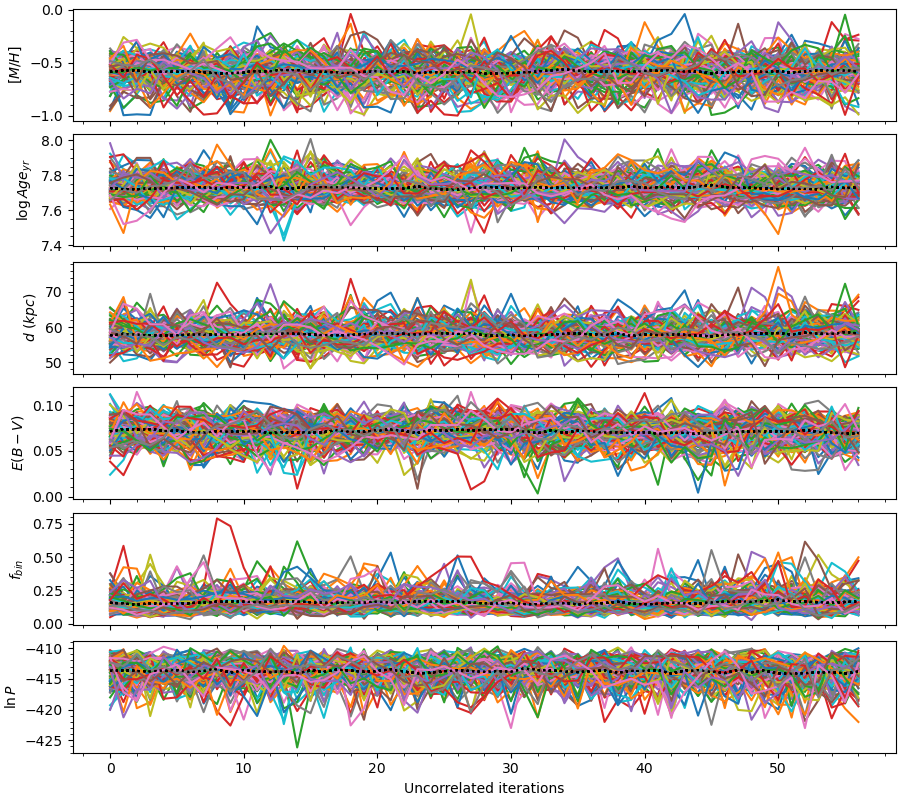

In [13]:
#Chain
importlib.reload(ChainAnalysis)
try: plt.close(figSamples)
except: ''
samples,logprob,figSamples = ChainAnalysis.Samples(backend,
                                                   Filter = True,   
                                                   walkers_show = 108)

## Checking the solution

Finally, we can check the solution obtained by the SIESTA code. The following figure displays the corner plot of the uncorrelated iterations after the burn-in phase. One-dimensional histograms are also shown.  Red lines/points indicate the median solutions, with red rectangles finalizing the intervals between the $1\sigma$ percentiles. Finally, the green lines/points represent the "best fit," i.e., the solution with the highest posterior probability. We also display the observed cluster CMD, together with the median solution's synthetic population, for comparison.


Median values (1 sigma quantiles for uncertainties)
	 [M/H] = -0.58 +0.10 -0.11
	 logAge = 7.72 +0.07 -0.05 	 Age (Gyr) = 0.05 +0.01 -0.01
	 dist = 57.75 +3.00 -2.51 	 (m-M)0 = 18.81 +0.11 -0.10
	 E(B-V) = 0.07 +0.01 -0.01
	 Bin. fraction = 0.15 +0.07 -0.05
Best values (max posterior):
	 [M/H] = -0.58
	 logAge = 7.69 	 Age (Gyr) = 0.05
	 dist = 57.44 	 (m-M)0 = 18.80
	 E(B-V) = 0.07
	 Bin. fraction = 0.15
Skewed normal distribution fit (mode and standard deviation):
	 [M/H] = -0.58 +/- 0.09
	 logAge = 7.70 +/- 0.06 	 Age (Gyr) = 0.05 +/- 0.01
	 dist = 57.45 +/- 2.57 	 (m-M)0 =  18.80 +/- 0.10
	 E(B-V) = 0.07 +/- 0.01
	 Bin. fraction =  0.13 +/- 0.05
Fit properties
	[M/H]:	 a = 1.181,	 loc = -0.6395,	 scale = 0.1141
	logAge:	 a = 3.498,	 loc = 7.66,	 scale = 0.09112
		Age:	 a = 4.132,	 loc = 0.04526,	 scale = 0.01081
	dist:	 a = 1.709,	 loc = 55.53,	 scale = 3.538
	(m-M)0:	 a = 1.592,	 loc = 18.73,	 scale = 0.1306
	E(B-V):	 a = -1.802,	 loc = 0.0841,	 scale = 0.01869
	Bin. F.:	 a = 3.03

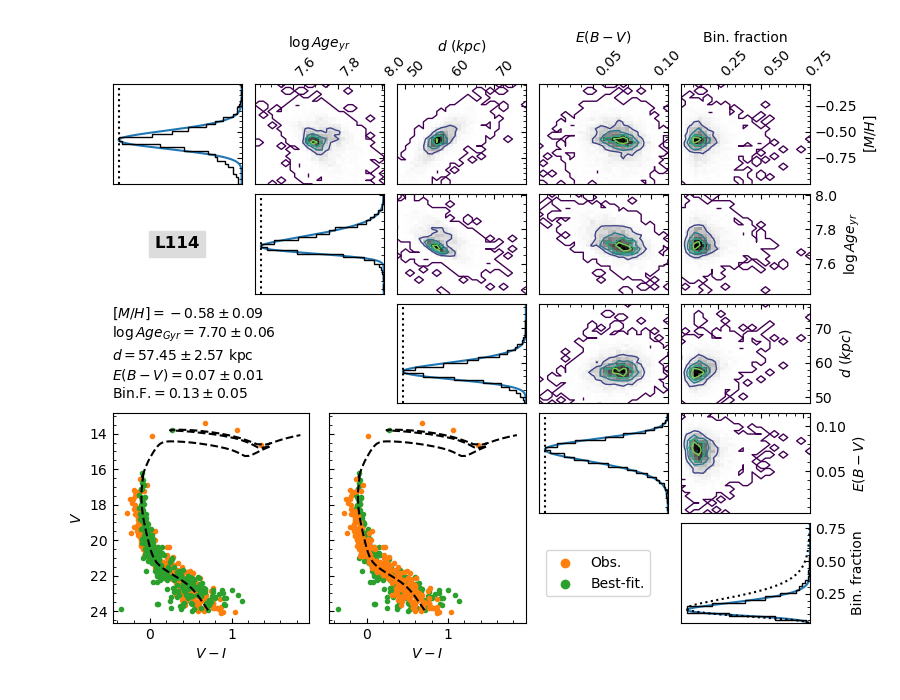

In [14]:
#Corner
importlib.reload(ChainAnalysis)
try: plt.close(figCorner)
except: ''
import matplotlib.pyplot as plt
plt.close('all')

best,median,fit,figCorner,samples = ChainAnalysis.Corner(backend,project,
                                                        age_plot='log',
                                                        distance_plot='linear',
                                                        seed=2,
                                                        title=project,
                                                        synt_label='Best-fit.',
                                                        obs_label='Obs.')
figCorner.savefig('projects/{}/corner.pdf'.format(project),format='pdf',dpi=600, bbox_inches='tight')

This last plot allows you to compare the cluster CMD with a particular synthetic population more closely while showing the Hess diagrams at the bottom. The ``values`` parameter allows you to choose which parameters set you want to see together with the cluster CMD. Setting it as ``median`` will display the median solution, while setting it as ``best`` will show the best solution. You can also select a custom solution, setting this parameter as a list with the syntax.

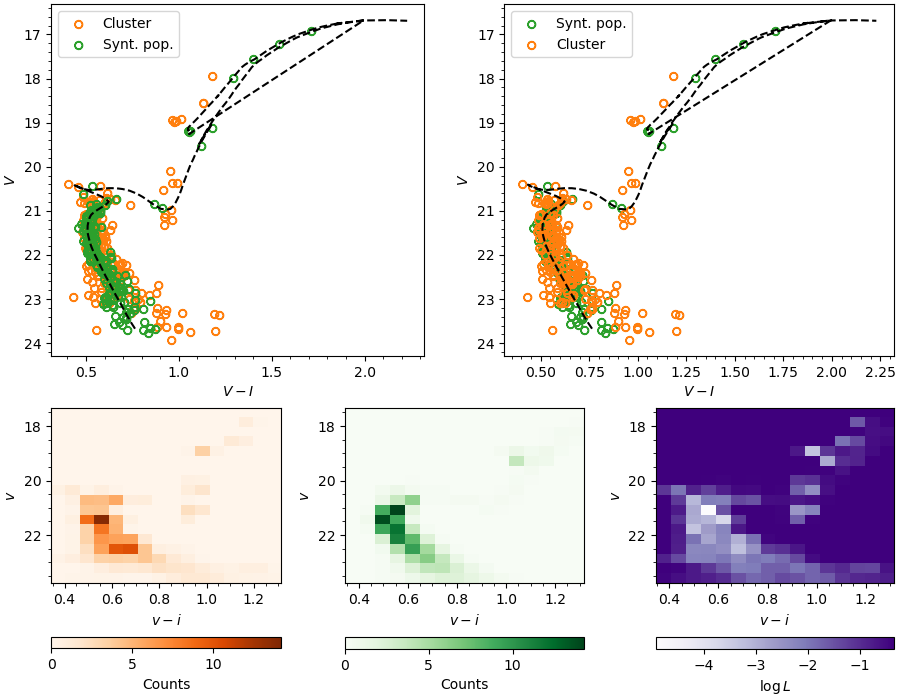

In [13]:
#Population comparisson
importlib.reload(ChainAnalysis)
#try: plt.close(figPop)
#except: ''



figPop = ChainAnalysis.Population(project,
                                  values=[-0.43,9.35,49.7,0.09,0.2],
                                  seed = 2)

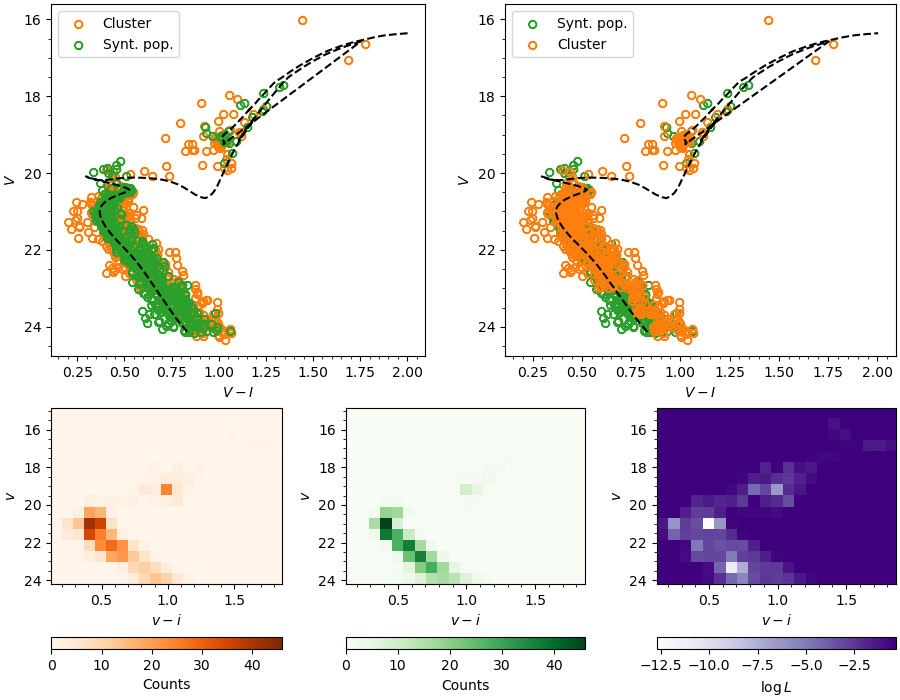

In [29]:
figPop = ChainAnalysis.Population(project,
                                  values=[-0.56,9.26,49,0.10,0.3],
                                  seed = 2)

In [58]:
samples

array([[-6.03344845e-01,  9.08852597e+00,  4.75396763e+01, ...,
         5.33568362e-01,  1.22610022e+00,  1.83852811e+01],
       [-4.39490107e-01,  8.98730006e+00,  5.19840687e+01, ...,
         5.53336690e-01,  9.71180747e-01,  1.85793513e+01],
       [-1.59906988e-01,  8.98741866e+00,  5.45286209e+01, ...,
         5.47997197e-01,  9.71445983e-01,  1.86831226e+01],
       ...,
       [-2.32298425e-01,  9.02813945e+00,  4.91908253e+01, ...,
         2.52170935e-01,  1.06693867e+00,  1.84594205e+01],
       [-1.88433906e-02,  8.97567883e+00,  5.57828624e+01, ...,
         5.17052573e-01,  9.45537648e-01,  1.87325040e+01],
       [-1.30594317e-01,  8.95016701e+00,  5.63574207e+01, ...,
         4.17277906e-01,  8.91593741e-01,  1.87547555e+01]])

## Saving images

This last block saves all figures into a PDF file in the corresponding project directory.

In [7]:
importlib.reload(ChainAnalysis)
ChainAnalysis.SaveAll(project,[figAutoCorrelation,figSamples,figCorner,figPop])

100 100
[5.         0.         2.14955688]


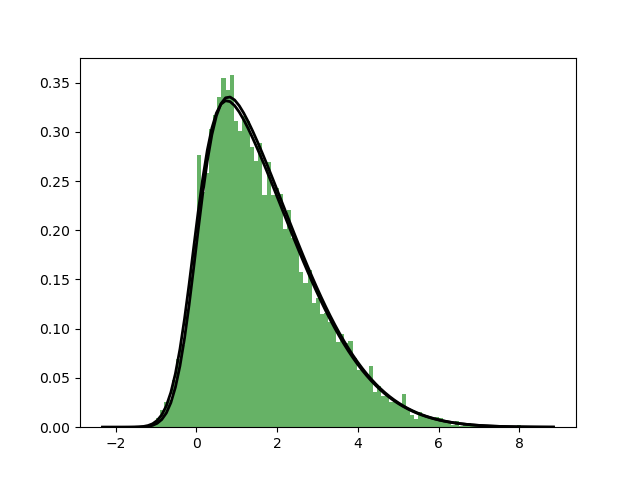

In [165]:
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

def SKN(x,a,loc,scale):
    return stats.skewnorm.pdf(x,ae, loce, scale)

# choose some parameters
a, loc, scale = 5.3, -0.1, 2.2
# draw a sample
data = stats.skewnorm(a, loc, scale).rvs(10000)

#data = data[(data<3)&(data>0)]

# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(data,method='MLE')
# Plot the PDF.
plt.figure()
h,xedge,_ = plt.hist(data, bins=100, density=True,alpha=0.6, color='g')
x = [ (xedge[i]+xedge[i+1])/2 for i in range(0,len(xedge)-1) ]
print(len(x),len(h))
popt, pcov = curve_fit(SKN, x, h, p0 = [5,0,2] )

print(popt)


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x,ae, loce, scalee)#.rvs(100)
p2 = stats.skewnorm.pdf(x,popt[0], popt[1], popt[2])
plt.plot(x, p, 'k', linewidth=2)
plt.plot(x, p2, 'k', linewidth=2)


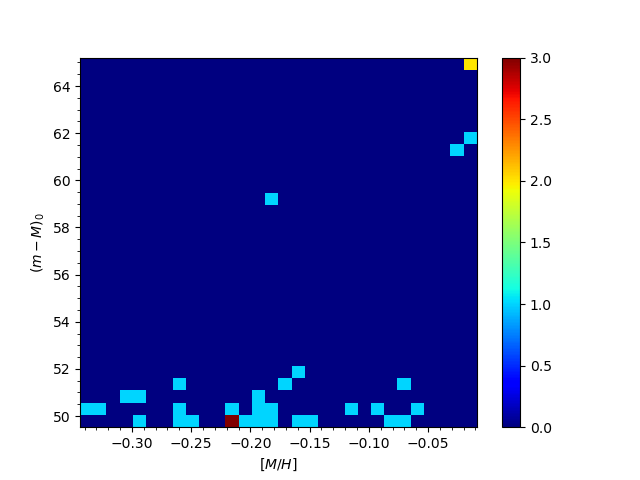

In [62]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 
from matplotlib.ticker import AutoMinorLocator
plt.close('all')
fig,ax = plt.subplots(nrows=1,ncols=1)

idx = (samples[:,0]>-1) & (samples[:,0]<0.) & (samples[:,2]>49.5) 
mh = samples[idx,0]
d = samples[idx,2]
counts,xbins,ybins,image = ax.hist2d(mh,d,bins=30,cmap='jet')
#ax.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],cmap = plt.cm.viridis,linewidths=1)
ax.set_xlabel(r'$[M/H]$')
ax.set_ylabel(r'$(m-M)_0$')
fig.colorbar(image,ax=ax)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


[-1.88167032 -1.27716653 -0.32099588 ... -0.73653287 -0.97590898
 -1.58967514]


C:\Users\plfbe\AppData\Local\Temp\ipykernel_10800\2204486078.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!


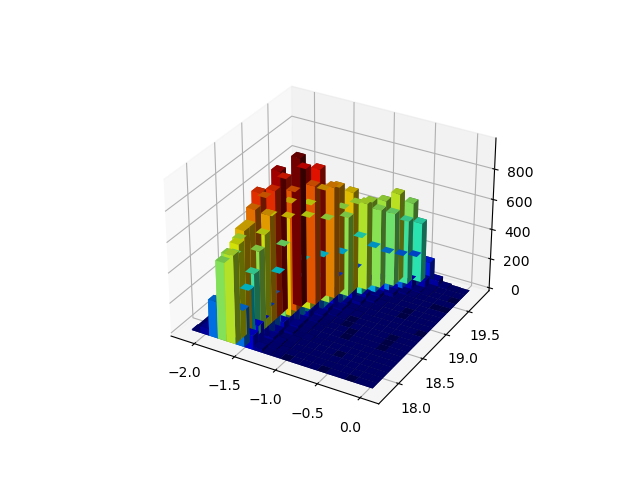

In [161]:
import numpy as np 
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

print(mh)

ax = plt.figure().add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(mh, d, bins=(20,20))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like(xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')

In [162]:
fit

[-1.282612066672483,
 7.838314539832074,
 43.8186946180344,
 0.04988430969804823,
 0.13386477158397705,
 0.061034041424983934,
 18.227846806674144]

In [21]:
import pandas as pd
import numpy as np

df = pd.DataFrame()

df['bla'] = np.random.rand(100)

df.drop(df[df['bla']<0].index)

df2 = df[df['bla']<=-1]
df2

,bla


In [25]:
from numpy import  log,arange,ceil,meshgrid
from numpy import sum as sumall
from scipy.interpolate import interpn
from scipy.special import loggamma   
def TremmelLikelihood( Nclu, Nsyn):
    return loggamma( 0.5 + Nclu + Nsyn ) - ( 0.5 + Nclu + Nsyn )*log(2) - loggamma(0.5 + Nsyn) - loggamma( 1 + Nclu )


Nclu = [1,15.5,10.2]
Nsyn = 

#Define integer values
NcluRef = arange( 0,ceil(Nclu.max()),1 )
NsynRef = arange( 0,ceil(Nsyn.max()),1 )
NcluRef,NsynRef = meshgrid(NcluRef,NsynRef)
#Define grid
NcluGrid,NsynGrid = meshgrid(Nclu,Nsyn)
#Interpolator
interp = LinearNDInterpolator(list(zip(NcluRef,NsynRef)), TremmelLikelihood(NcluRef,NsynRef))
print(interp(NcluGrid,NsynGrid)/T)
return sumall( interp(NcluGrid,NsynGrid)/T)

NameError: name 'Nclu' is not defined

In [59]:
import numpy as np

from scipy.interpolate import interpn

def value_func_3d(x, y):

    return 2 * x + 3 * y 

x = np.linspace(0, 3, 5)

y = np.linspace(0, 3, 6)



points = (x, y)

values = value_func_3d(*np.meshgrid(*points, indexing='ij'))

point = np.array([[2.21, 3.12], [2.21, 3.12]])

print(interpn(points, values, point))

ValueError: One of the requested xi is out of bounds in dimension 1

In [27]:
values

array([[ 0.,  3.,  6.,  9., 12., 15.],
       [ 2.,  5.,  8., 11., 14., 17.],
       [ 4.,  7., 10., 13., 16., 19.],
       [ 6.,  9., 12., 15., 18., 21.],
       [ 8., 11., 14., 17., 20., 23.]])

In [28]:
x

array([0., 1., 2., 3., 4.])

In [30]:
point = np.array([[2.21, 3.12], [2.21, 3.12]])

print(interpn(points, values, point))

[13.78 13.78]


In [31]:
point = np.column_stack([[2.21, 2.21], [3.12, 3.12]])

print(interpn(points, values, point))

[13.78 13.78]


In [36]:
a = np.random.normal(0,1,[5,5])
a

array([[-0.85611373, -0.13706789,  0.06769792, -0.32051853, -0.41224012],
       [ 0.74847949, -1.14156935,  0.47414311, -0.23190087,  0.17674538],
       [-0.09419532, -0.38028407,  0.07024772,  0.92990145,  1.12776794],
       [ 0.45385841, -0.27267269,  1.09944981, -1.30261409,  0.85272639],
       [ 0.54188537,  0.54400341, -0.53910652, -1.54347092, -0.19704179]])

In [37]:
a.max()

1.1277679358087864